<a href="https://colab.research.google.com/github/natka67/Atrakcyjnosc_regionow/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('countries of the world (2).csv')

In [136]:
dataset.head()

Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0          647500                       48,0                         0,00   
1           28748                      124,6                         1,26   
2         2381740                       13,8                         0,04   
3             199                      290,4                        58,29   
4             468                      152,1                         0,00   

  Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0         23,06                             163,07               700.0   
1         -4,93                              21,52              4500.0   
2         -0,39                                 31              6000.0   
3        -20,71                               9,27              8000.0   
4           6,6                               4,05             19000.0   

  Literacy (%) Phones (per 1000) Arable (%) Crops (%) Other (%) Climate  \
0         36,0               3,2      12,13      0,22     87,65       1   
1         86,5              71,2      21,09      4,42     74,49       3   
2         70,0              78,1       3,22      0,25     96,53       1   
3         97,0             259,5         10        15        75       2   
4        100,0             497,2       2,22         0     97,78       3   

  Birthrate Deathrate Agriculture Industry Service  
0      46,6     20,34        0,38     0,24    0,38  
1     15,11      5,22       0,232    0,188   0,579  
2     17,14      4,61       0,101      0,6   0,298  
3     22,46      3,27         NaN      NaN     NaN  
4      8,71      6,25         NaN      NaN     NaN

In [137]:
dataset.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [138]:
numeric_columns = ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service']
categoric_columns = ['Country', 'Region']

In [139]:
from sklearn.preprocessing import MinMaxScaler
#dataset = dataset.dropna()
for col in numeric_columns:
  dataset[col] = dataset[col].replace(',','.', regex=True)
  dataset[col] = pd.to_numeric(dataset[col])
  dataset[col] = dataset[col].fillna(dataset[col].mean())
  scaler = MinMaxScaler()
  dataset[col] = scaler.fit_transform(dataset[col].values.reshape(-1, 1))

In [140]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    float64
 3   Area (sq. mi.)                      227 non-null    float64
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       227 non-null    float64
 7   Infant mortality (per 1000 births)  227 non-null    float64
 8   GDP ($ per capita)                  227 non-null    float64
 9   Literacy (%)                        227 non-null    float64
 10  Phones (per 1000)                   227 non-null    float64
 11  Arable (%)                          227 non-n

In [141]:
for col in categoric_columns:
  dataset[col] = dataset[col].str.strip().str.lower()
  uniq = set((dataset[col]))
  print(len(uniq))

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['Region'] = label_encoder.fit_transform(dataset['Region'])
numeric_columns.append('Region')

227
11


In [142]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset[numeric_columns])
cluster_labels = kmeans.labels_
dataset['cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [143]:
print(dataset.head())
dataset.to_excel('clustered_data.xlsx')

          Country  Region  Population  Area (sq. mi.)  \
0     afghanistan       0    0.023631        0.037920   
1         albania       3    0.002720        0.001683   
2         algeria       6    0.025056        0.139485   
3  american samoa       8    0.000039        0.000012   
4         andorra      10    0.000049        0.000027   

   Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  Net migration  \
0                    0.002950                      0.000000       1.000000   
1                    0.007658                      0.001447       0.364586   
2                    0.000848                      0.000046       0.467650   
3                    0.017847                      0.066949       0.006356   
4                    0.009348                      0.000000       0.626334   

   Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  ...  \
0                            0.851138            0.003663      0.223301  ...   
1                           

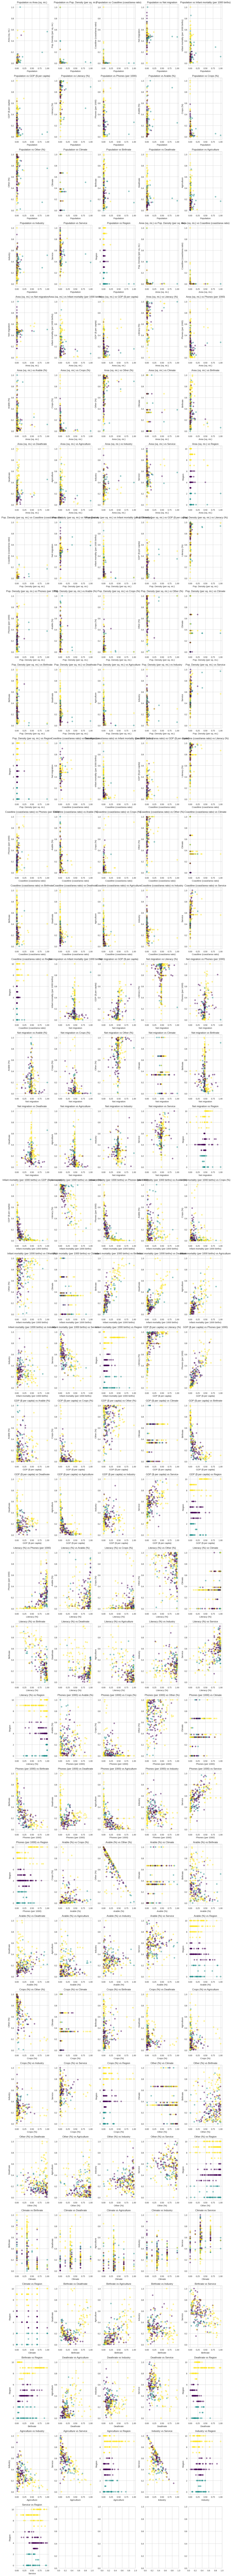

In [144]:
import itertools

def visualize_kmeans(dataset, model):
  columns = dataset.columns
  combinations = list(itertools.combinations(columns, 2))

  num_plots = len(combinations)
  num_cols = 5
  num_rows = (num_plots + num_cols - 1) // num_cols

  fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
  axes = axes.flatten()

  for i, (col1, col2) in enumerate(combinations):
    ax = axes[i]

    ax.scatter(dataset[col1], dataset[col2], c=model.labels_, cmap='viridis', alpha=0.5)
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_title(f'{col1} vs {col2}')

  plt.tight_layout()
  plt.show()

visualize_kmeans(dataset[numeric_columns], kmeans)


In [147]:
len(set(dataset['Country']))

227

In [155]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
print(len(set(world['name'])))
world['name'] = world['name'].str.lower()
merged = pd.merge(world['name'], dataset['Country'], how='outer', left_on='name', right_on='Country', indicator=True)
print(set(merged['_merge']))
result = merged[merged['_merge'] != 'both']
result.to_excel('missing_countries.xlsx')


<ipython-input-155-d6c752bdcfb2>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


177
{'both', 'left_only', 'right_only'}


In [150]:
#world[world['cluster'].isna()]['name']

In [156]:
country_mapping = {
    'w. sahara': 'western sahara',
    'united states of america': 'united states',
    'dem. rep. congo': 'congo, dem. rep.',
    'dominican rep.': 'dominican republic',
    'bahamas': 'bahamas, the',
    'falkland is.': 'falkland islands',
    'fr. s. antarctic lands': 'french southern and antarctic lands',
    'timor-leste': 'east timor',
    "côte d'ivoire": "cote d'ivoire",
    'congo': 'congo, repub. of the',
    'eq. guinea': 'equatorial guinea',
    'eswatini': 'swaziland',
    'palestine': 'west bank',
    'gambia': 'gambia, the',
    'myanmar': 'burma',
    'north korea': 'korea, north',
    'south korea': 'korea, south',
    'solomon is.': 'solomon islands',
    'czechia': 'czech republic',
    'antarctica': 'french southern territories',
    'n. cyprus': 'cyprus',
    'somaliland': 'somalia',
    'bosnia and herz.': 'bosnia & herzegovina',
    'north macedonia': 'macedonia',
    'trinidad and tobago': 'trinidad & tobago',
    's. sudan': 'south sudan'
}


In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world['name'] = world['name'].str.lower()
world['name'] = world['name'].replace(country_mapping)
merged = pd.merge(world['name'], dataset['Country'], how='outer', left_on='name', right_on='Country', indicator=True)
result = merged[merged['_merge'] != 'both']
result.to_excel('missing_countries2.xlsx')

world = world.merge(dataset, how='left', left_on='name', right_on='Country')
world['cluster'] = world['cluster'].replace(np.nan, 'Blank')
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

world.plot(column='cluster', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_xticks([])
ax.set_yticks([])

plt.title("World Map Colored by Cluster")
plt.show()


<ipython-input-157-d81a0e50c22d>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

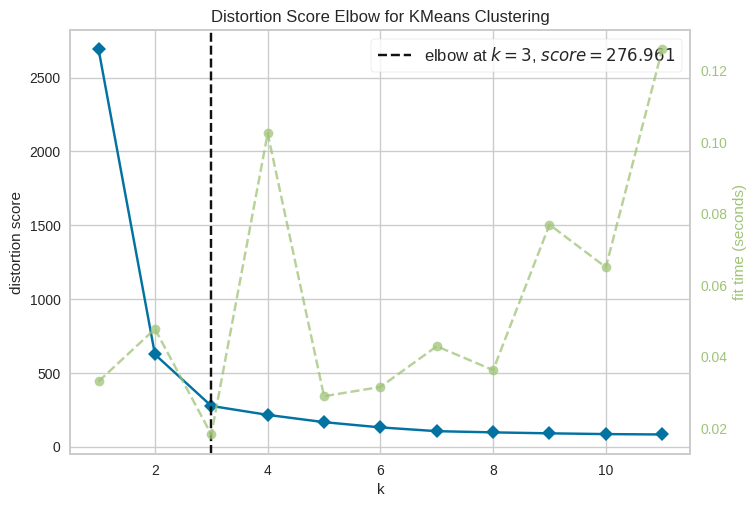

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [153]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(dataset[numeric_columns])
visualizer.show()

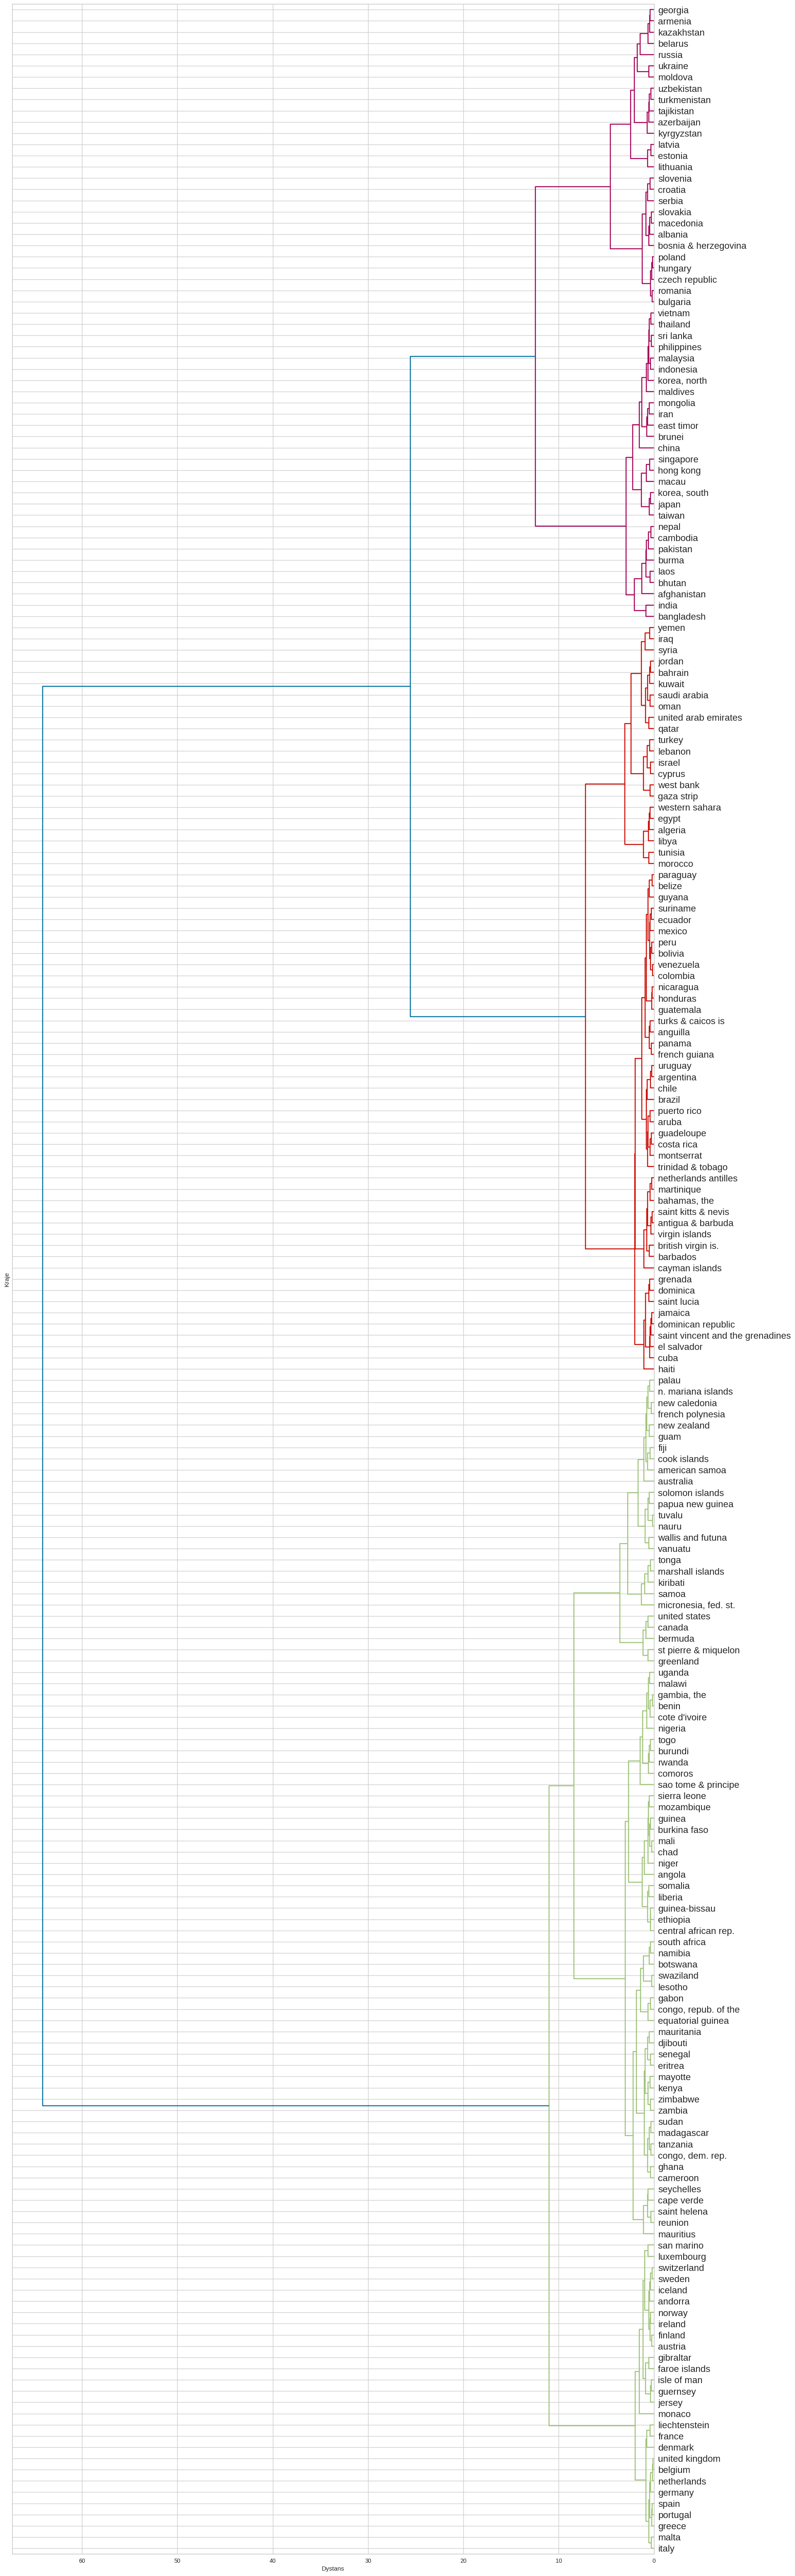

In [154]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

d = hierarchy.linkage(dataset[numeric_columns], method='ward')

plt.figure(figsize=(20, 80))
hierarchy.dendrogram(d, labels=dataset['Country'].values, leaf_rotation=0, leaf_font_size=16, orientation='left',  color_threshold=20)
plt.xlabel('Dystans')
plt.ylabel('Kraje')
plt.show()
